In [1]:
import pandas as pd

# --- Datos base ---
data = {
    'Mes': ['Ene', 'Feb', 'Mar', 'Abr', 'May'],
    'Ventas': [45000, 52000, 38000, 61000, 48000],
    'Visitantes': [15000, 18200, 12500, 20500, 16800],
    'Conversion (%)': [3.2, 2.9, 3.8, 3.1, 2.7],
    'Gasto_Publicidad': [8500, 9800, 7200, 11200, 9500],
    'Productos_Vendidos': [450, 520, 380, 610, 480]
}

df = pd.DataFrame(data)

# --- 1. Eficiencia (ventas / gasto publicidad) ---
df['Eficiencia'] = df['Ventas'] / df['Gasto_Publicidad']

# --- 2. Ticket promedio (ventas / productos vendidos) ---
df['Ticket_Promedio'] = df['Ventas'] / df['Productos_Vendidos']

# --- 3. Relación entre visitantes y ventas ---
correlacion = df['Ventas'].corr(df['Visitantes'])

# --- 4. Resultados ---
print("📊 Tabla completa:\n")
display(df)

print(f"\n🔹 Mes con mayor eficiencia: {df.loc[df['Eficiencia'].idxmax(), 'Mes']}")
print(f"🔹 Mes con mejor conversión: {df.loc[df['Conversion (%)'].idxmax(), 'Mes']}")
print(f"🔹 Mes con mayor ticket promedio: {df.loc[df['Ticket_Promedio'].idxmax(), 'Mes']}")
print(f"\n🔹 Correlación entre visitantes y ventas: {correlacion:.3f}")


📊 Tabla completa:



,Mes,Ventas,Visitantes,Conversion (%),Gasto_Publicidad,Productos_Vendidos,Eficiencia,Ticket_Promedio
0,Ene,45000,15000,3.2,8500,450,5.294118,100.0
1,Feb,52000,18200,2.9,9800,520,5.306122,100.0
2,Mar,38000,12500,3.8,7200,380,5.277778,100.0
3,Abr,61000,20500,3.1,11200,610,5.446429,100.0
4,May,48000,16800,2.7,9500,480,5.052632,100.0



🔹 Mes con mayor eficiencia: Abr
🔹 Mes con mejor conversión: Mar
🔹 Mes con mayor ticket promedio: Ene

🔹 Correlación entre visitantes y ventas: 0.990


<Figure size 1200x600 with 0 Axes>

C:\Users\EdwarAugustoJaramill\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


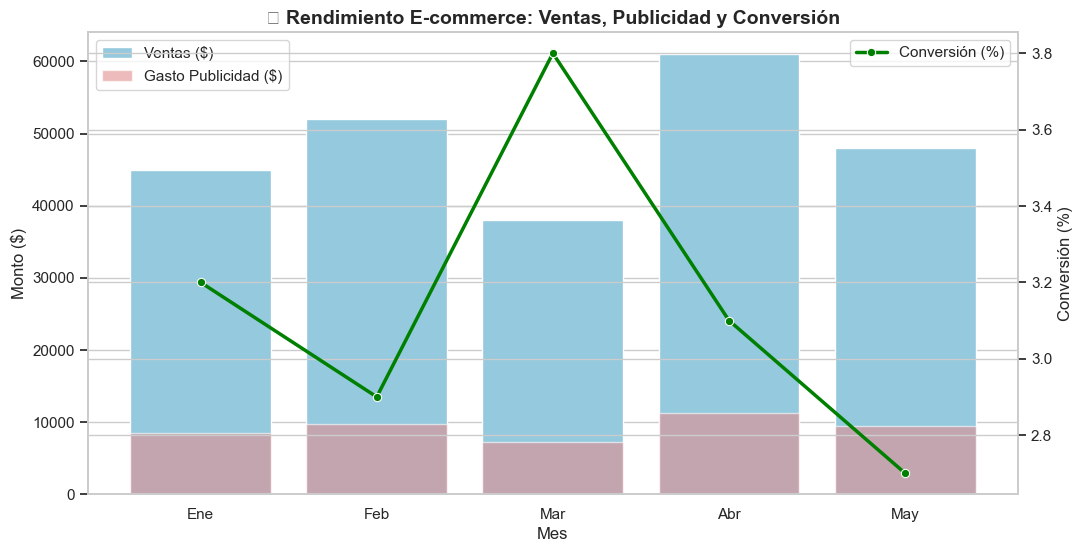

C:\Users\EdwarAugustoJaramill\AppData\Local\Temp\ipykernel_32916\1484975744.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mes', y='Eficiencia', data=df, palette='coolwarm')
C:\Users\EdwarAugustoJaramill\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


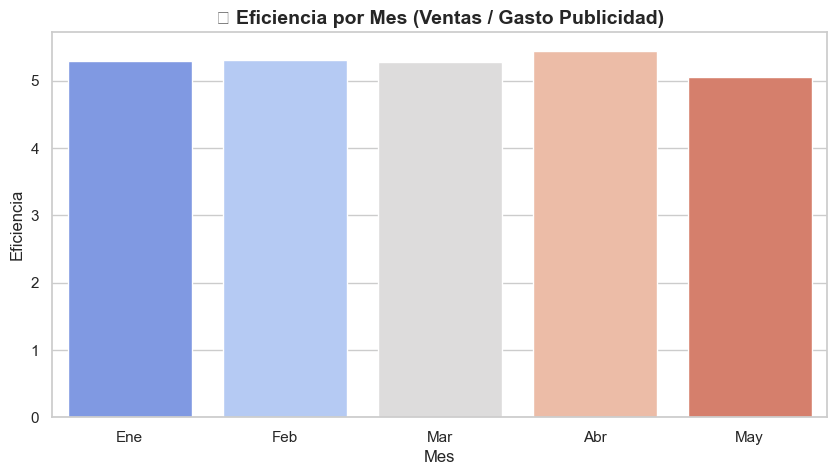

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# --- Gráfico 1: Ventas vs Gasto Publicidad + Conversión ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras para ventas y gasto publicidad
sns.barplot(x='Mes', y='Ventas', data=df, color='skyblue', label='Ventas ($)', ax=ax1)
sns.barplot(x='Mes', y='Gasto_Publicidad', data=df, color='lightcoral', alpha=0.6, label='Gasto Publicidad ($)', ax=ax1)

ax1.set_xlabel("Mes")
ax1.set_ylabel("Monto ($)")
ax1.legend(loc="upper left")

# Línea para tasa de conversión (%)
ax2 = ax1.twinx()
sns.lineplot(x='Mes', y='Conversion (%)', data=df, color='green', marker='o', linewidth=2.5, label='Conversión (%)', ax=ax2)
ax2.set_ylabel("Conversión (%)")
ax2.legend(loc="upper right")

plt.title("📈 Rendimiento E-commerce: Ventas, Publicidad y Conversión", fontsize=14, fontweight='bold')
plt.show()

# --- Gráfico 2: Eficiencia por mes (Ventas / Gasto) ---
plt.figure(figsize=(10, 5))
sns.barplot(x='Mes', y='Eficiencia', data=df, palette='coolwarm')
plt.title("💡 Eficiencia por Mes (Ventas / Gasto Publicidad)", fontsize=14, fontweight='bold')
plt.xlabel("Mes")
plt.ylabel("Eficiencia")
plt.show()


In [3]:
import plotly.express as px

# --- Cálculo adicional opcional ---
df['ROI (%)'] = ((df['Ventas'] - df['Gasto_Publicidad']) / df['Gasto_Publicidad']) * 100

# --- 1️⃣ Gráfico: Ventas vs Gasto Publicidad ---
fig1 = px.bar(
    df,
    x='Mes',
    y=['Ventas', 'Gasto_Publicidad'],
    barmode='group',
    title='📊 Ventas vs Gasto en Publicidad (por mes)',
    labels={'value': 'Monto ($)', 'variable': 'Categoría'},
    text_auto=True,
    color_discrete_sequence=['#1f77b4', '#ff7f0e']
)
fig1.update_layout(title_x=0.5)
fig1.show()

# --- 2️⃣ Gráfico: Conversión y Eficiencia ---
fig2 = px.line(
    df,
    x='Mes',
    y=['Conversion (%)', 'Eficiencia'],
    markers=True,
    title='📈 Conversión (%) y Eficiencia (Ventas/Gasto)',
    color_discrete_sequence=['green', 'royalblue']
)
fig2.update_traces(line=dict(width=3))
fig2.update_layout(title_x=0.5)
fig2.show()

# --- 3️⃣ Gráfico: Ticket promedio y ROI ---
fig3 = px.bar(
    df,
    x='Mes',
    y=['Ticket_Promedio', 'ROI (%)'],
    barmode='group',
    title='💰 Ticket Promedio y ROI (%) por Mes',
    labels={'value': 'Valor', 'variable': 'Indicador'},
    text_auto=True,
    color_discrete_sequence=['#636EFA', '#EF553B']
)
fig3.update_layout(title_x=0.5)
fig3.show()

fig1.write_html("ventas_vs_publicidad.html")
fig2.write_html("conversion_eficiencia.html")
fig3.write_html("ticketpromedio_roi.html")